# Toolkit

In [58]:
import pandas as pd
import numpy as np

import seaborn as sns

from datasist.structdata import detect_outliers

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import joblib

# Import and Inspect dataset

In [59]:
insurance = pd.read_csv(r"insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
# random sample
insurance.sample(5)

,age,sex,bmi,children,smoker,region,charges
408,38,male,21.120,3,no,southeast,6652.52880
1016,19,female,24.605,1,no,northwest,2709.24395
1098,52,female,30.875,0,no,northeast,23045.56616
363,21,female,26.400,1,no,southwest,2597.77900
1092,23,male,32.700,3,no,southwest,3591.48000


In [61]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Preprocessing

### Duplicates

In [62]:
insurance.duplicated().sum()

1

In [63]:
# drop it 
insurance.drop_duplicates(inplace=True)

### Nulls

In [64]:
# percentage
(insurance.isna().sum()/insurance.shape[0])*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# EDA

In [65]:
insurance.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [66]:
insurance["age"].value_counts()

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [67]:
insurance["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [68]:
insurance["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [69]:
insurance["bmi"].value_counts()

32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64

In [70]:
insurance["children"].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [71]:
insurance["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [72]:
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [73]:
insurance["charges"].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

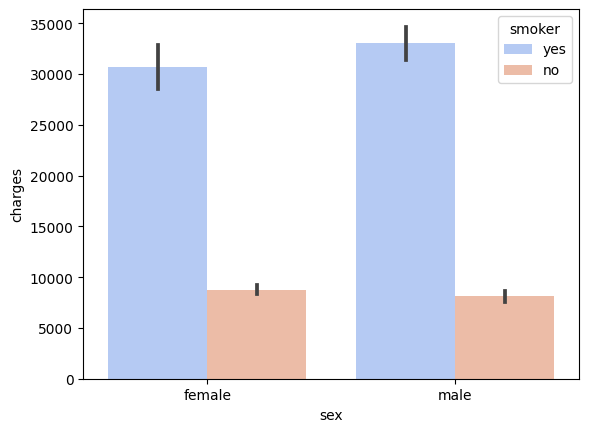

In [74]:
sns.barplot(x='sex', y='charges', hue='smoker', data=insurance, palette='coolwarm')

<Axes: xlabel='region', ylabel='charges'>

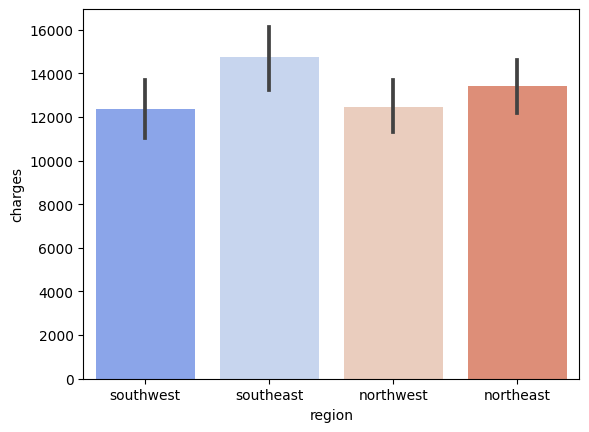

In [75]:
sns.barplot(x='region', y='charges', data=insurance, palette='coolwarm')

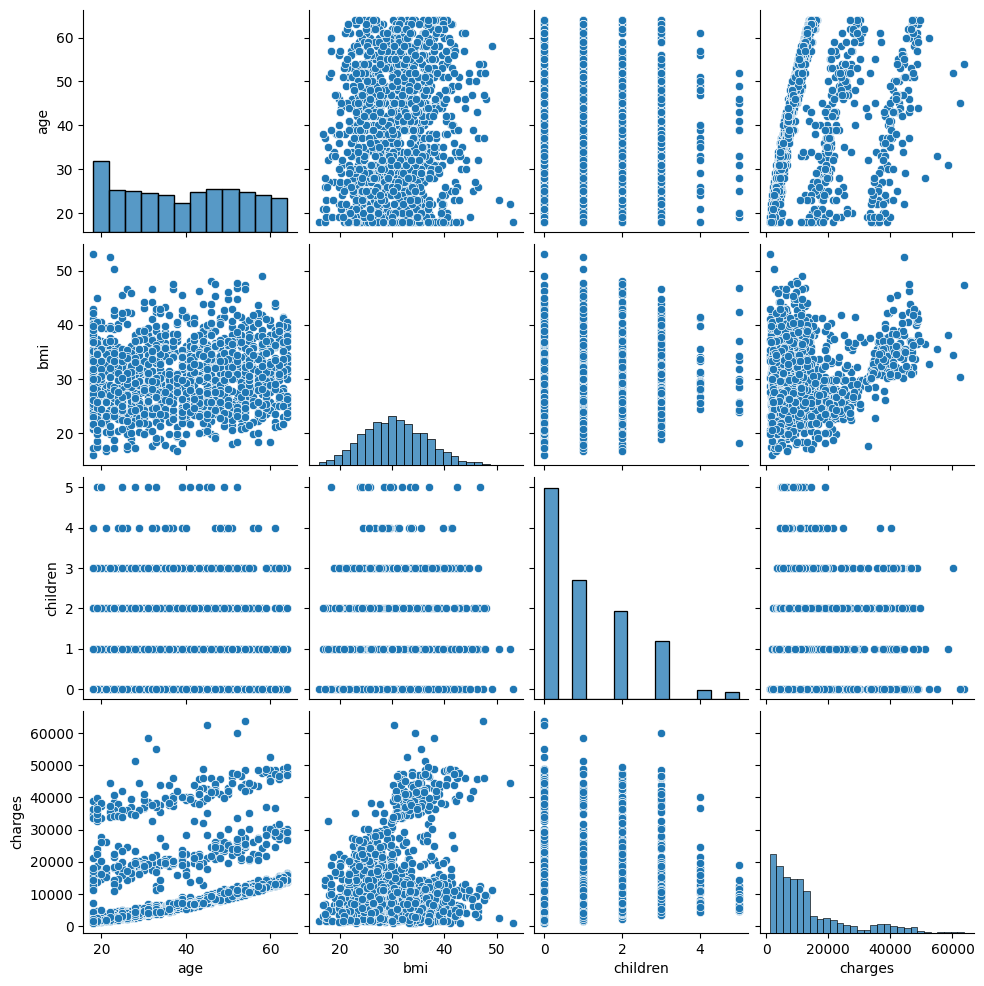

In [76]:
sns.pairplot(insurance)

C:\Users\shehab\AppData\Local\Temp\ipykernel_14104\683398845.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = insurance.corr()


<Axes: >

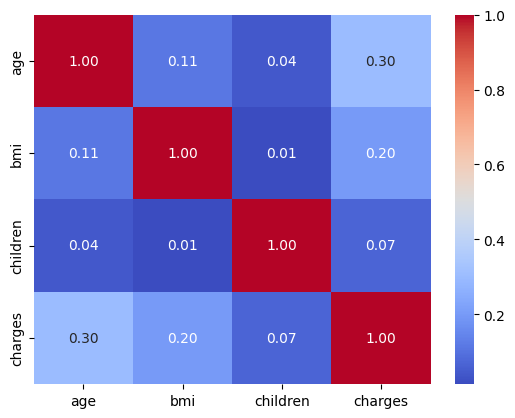

In [77]:
# Compute the correlation matrix
correlation_matrix = insurance.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [78]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='charges', ylabel='sex'>

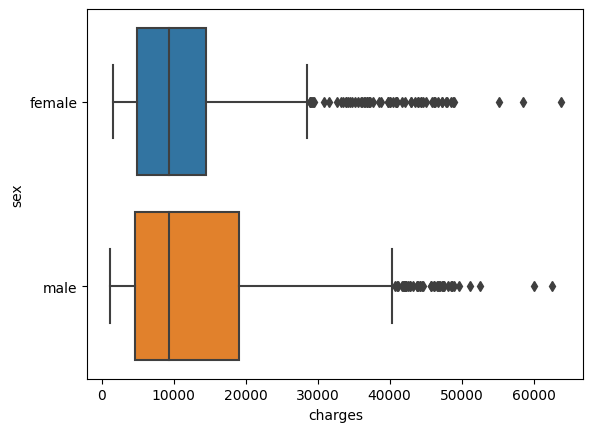

In [79]:
sns.boxplot(data=insurance, x="charges", y="sex")

<Axes: xlabel='charges', ylabel='smoker'>

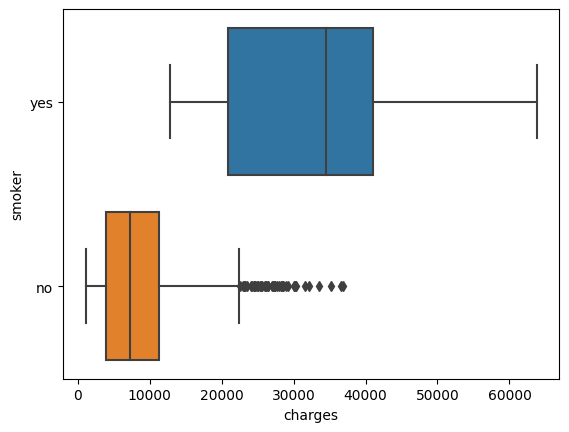

In [80]:
sns.boxplot(data=insurance, x="charges", y="smoker")

<Axes: xlabel='charges', ylabel='region'>

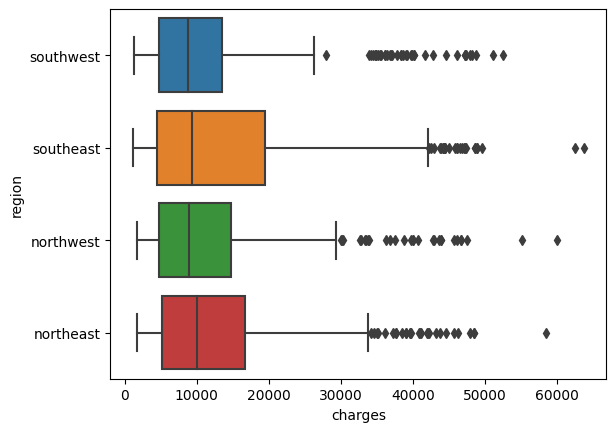

In [81]:
sns.boxplot(data=insurance, x="charges", y="region")

<Axes: xlabel='age', ylabel='Count'>

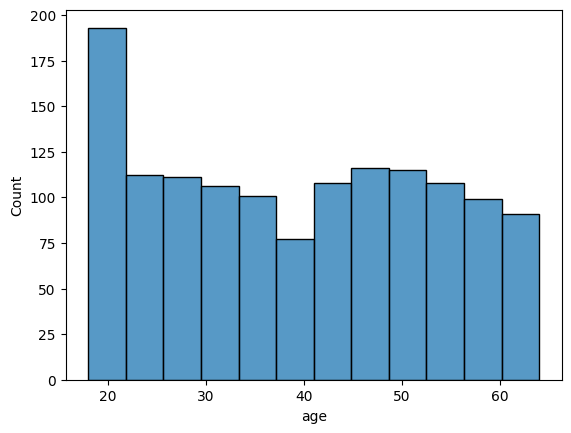

In [82]:
sns.histplot((insurance["age"]))

In [83]:
insurance.groupby("age").sum().sort_values(by="charges", ascending=False)


C:\Users\shehab\AppData\Local\Temp\ipykernel_14104\3749593775.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  insurance.groupby("age").sum().sort_values(by="charges", ascending=False)


,bmi,children,charges
age,,,
19,1914.000,29,661218.271650
52,955.145,43,529431.821860
54,874.560,40,525239.301310
43,815.520,44,520216.523640
64,725.475,17,512061.678420
47,889.265,40,511965.988200
61,748.610,17,506562.525000
60,697.655,8,505526.625670
18,2161.505,31,488949.011389


# Outliers

In [84]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: >

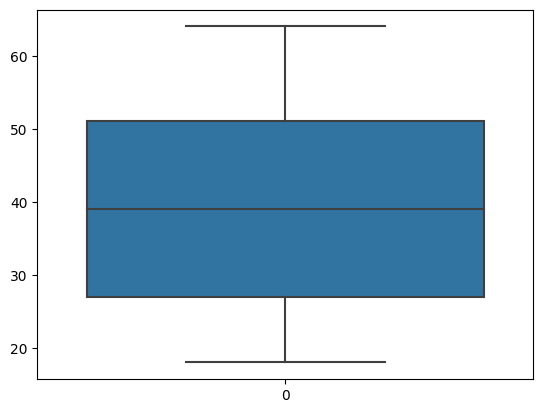

In [85]:
sns.boxplot(insurance["age"])

<Axes: >

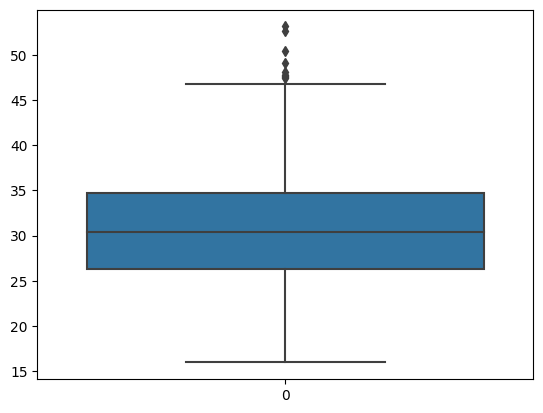

In [86]:
sns.boxplot(insurance["bmi"])

In [87]:
idx = detect_outliers(insurance, 0, ["bmi"])
(len(idx)/insurance.shape[0])*100

0.6731488406881078

In [88]:
# insurance.drop(idx, axis=0, inplace=True)

<Axes: >

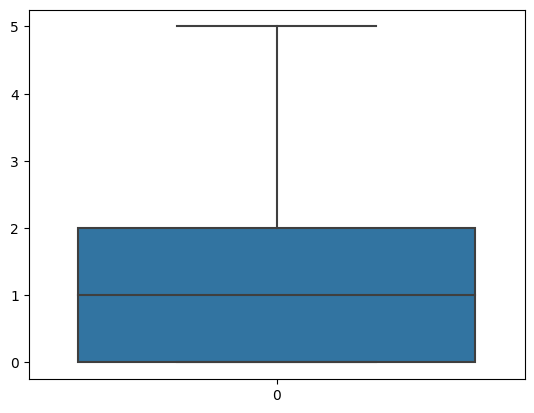

In [89]:
sns.boxplot(insurance["children"])

<Axes: >

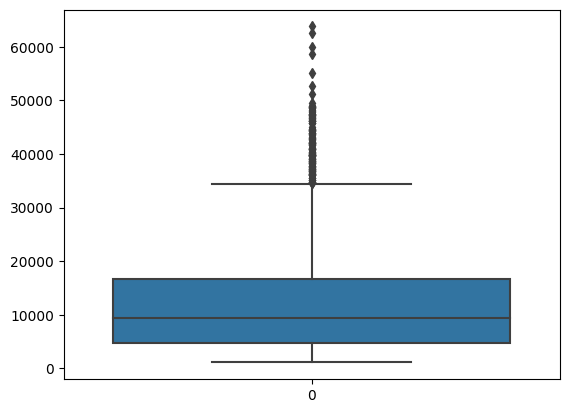

In [90]:
sns.boxplot(insurance["charges"])

In [91]:
idx = detect_outliers(insurance, 0, ["charges"])
(len(idx)/insurance.shape[0])*100


10.396409872849663

In [92]:
# insurance.drop(idx, axis=0, inplace=True)

In [93]:
# non_outlier_median = insurance.loc[~insurance.index.isin(idx), "charges"].median()

# insurance.loc[idx, "charges"] = non_outlier_median

In [94]:
# def handle_outliers(data, column):
#     # Calculate the lower and upper bounds using the IQR method
#     q1 = np.percentile(data[column], 25)
#     q3 = np.percentile(data[column], 75)
    
#     iqr = q3 - q1
    
#     lower_bound = q1 - (1.5 * iqr)
#     upper_bound = q3 + (1.5 * iqr)

#     # Identify outliers
#     outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

#     # Replace outliers with the median of non-outlier values
#     non_outliers = data[column][~outliers]
#     median_non_outliers = np.median(non_outliers)
#     data.loc[outliers, column] = median_non_outliers

#     return data

In [95]:
# insurance = handle_outliers(insurance, "charges")

<Axes: >

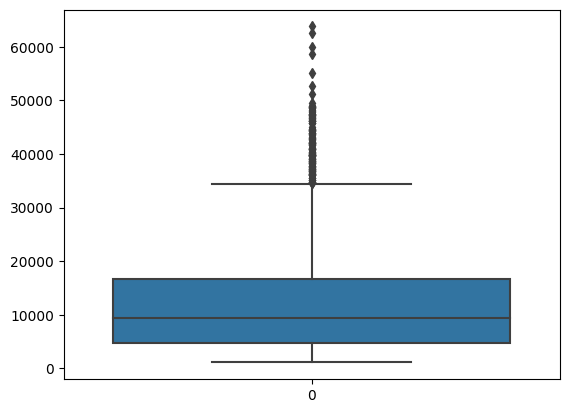

In [96]:
sns.boxplot(insurance["charges"])

# Encoding

In [97]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [98]:
# sex_encoder = OneHotEncoder(sparse=False)
# sex_encoded = sex_encoder.fit_transform(insurance[["sex"]])
# sex_encoded_df = pd.DataFrame(sex_encoded, columns=sex_encoder.get_feature_names_out())
# insurance = pd.concat([insurance, sex_encoded_df], axis=1)
# insurance.drop("sex", axis=1, inplace=True)
# insurance.head()

In [99]:
# smoker_encoder = OneHotEncoder(sparse=False)
# smoker_encoded = smoker_encoder.fit_transform(insurance[["smoker"]])
# smoker_encoded_df = pd.DataFrame(smoker_encoded, columns=smoker_encoder.get_feature_names_out())
# insurance = pd.concat([insurance, sex_encoded_df], axis=1)
# insurance.drop("smoker", axis=1, inplace=True)
# insurance.head()

In [100]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [101]:
insurance.dropna(axis=0, inplace=True)

In [102]:
insurance = pd.get_dummies(insurance, columns=["region", "sex", "smoker"], drop_first=True)
insurance

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


# Split

In [103]:
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [104]:
x

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,1,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,1,0,0,0
1336,21,25.800,0,0,0,1,0,0


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)
x_train

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
1039,19,27.265,2,1,0,0,1,0
1209,59,37.100,1,0,0,1,1,0
1015,59,25.460,0,1,0,0,1,0
398,64,25.600,2,0,0,1,1,0
538,46,28.050,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
145,29,38.830,3,0,1,0,0,0
343,63,36.765,0,0,0,0,1,0
192,25,25.740,0,0,1,0,1,0
900,49,22.515,0,0,0,0,1,0


# Scaling

In [106]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

# Linear model

In [107]:
model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)

LinearRegression()

In [108]:
model_lr.score(x_train_scaled, y_train)

0.7398720705798535

In [109]:
model_lr.score(x_test_scaled, y_test)

0.7707422384462745

In [110]:
r2_score(y_test, model_lr.predict(x_test_scaled))

0.7707422384462745

# KNN model

In [111]:
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [112]:
model_knn.score(x_train_scaled, y_train)

0.8510769517987131

In [113]:
model_knn.score(x_test_scaled, y_test)

0.798755502340704

In [114]:
r2_score(y_test, model_knn.predict(x_test_scaled))

0.798755502340704